### Understanding Two Approaches: Linear Regression vs Polynomial Regression

Let's break down the two approaches in the simplest way possible:

---

#### **1. Linear Regression on Polynomial Features**

- **What is it?**
    - Sometimes, the relationship between `X` and `y` is not a straight line (not linear). But linear regression can only fit straight lines.
    - To solve this, we **transform** our original data into a new form that includes polynomial terms (like \( X^2, X^3 \), etc.).
    - After this transformation, we use **linear regression** on this new data.

- **How does it work?**
    1. **Transform the data:**  
         Suppose your original data is just `X`. We create new features like \( X^2 \), \( X^3 \), etc.  
         For example, if \( X = 2 \), we add \( X^2 = 4 \), \( X^3 = 8 \), etc.
    2. **Apply linear regression:**  
         Now, we use linear regression, but instead of just using `X`, we use all these new features (`X`, \( X^2 \), \( X^3 \), ...).
    3. **Result:**  
         The model can now fit curves, not just straight lines, because it is using these extra polynomial features.

- **Why do this?**
    - Linear regression is simple and fast.
    - By transforming the data, we can use linear regression to fit more complex (curved) relationships.

---

#### **2. Polynomial Regression**

- **What is it?**
    - Polynomial regression is just a special case of linear regression where we fit a polynomial equation to the data.
    - In practice, it is the same as the first approach: we create polynomial features and then use linear regression.

- **How does it work?**
    1. **Create polynomial features:**  
         Just like before, we expand our data to include \( X^2, X^3, \) etc.
    2. **Fit the model:**  
         We fit a model that can learn the coefficients for each term (\( X, X^2, X^3, ... \)).
    3. **Result:**  
         The model can fit curves to the data.

- **Is it different from the first approach?**
    - **No!** In practice, both approaches are the same:  
        - We create polynomial features from the data.
        - We use linear regression to fit the model.
    - The only difference is in the name:  
        - "Linear regression on polynomial features" describes the steps.
        - "Polynomial regression" is the name for the overall method.

---

#### **Summary Table**

| Step                | Linear Regression on Polynomial Features | Polynomial Regression |
|---------------------|-----------------------------------------|----------------------|
| Transform features? | Yes                                     | Yes                  |
| Use linear reg.?    | Yes                                     | Yes                  |
| Fits curves?        | Yes                                     | Yes                  |
| Any difference?     | No, just different names                | No                   |

---

#### **In Code (What you did):**

- You used `PolynomialFeatures` to transform your data.
- Then you used `LinearRegression` to fit the model.
- This is **polynomial regression** using linear regression on polynomial features.

---

#### **In the simplest words:**

- **Linear regression** fits straight lines.
- **Polynomial regression** fits curves by first making new features (\( X^2, X^3, ... \)), then using linear regression.
- Both methods use the same steps: make polynomial features, then fit with linear regression.

---

In [181]:
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [166]:
X = 4 - np.random.rand(300,1) * 9
y = 0.1 * X**2 + 0.1 * X + 1 + np.random.rand(300,1)

In [167]:
X.shape, y.shape 

((300, 1), (300, 1))

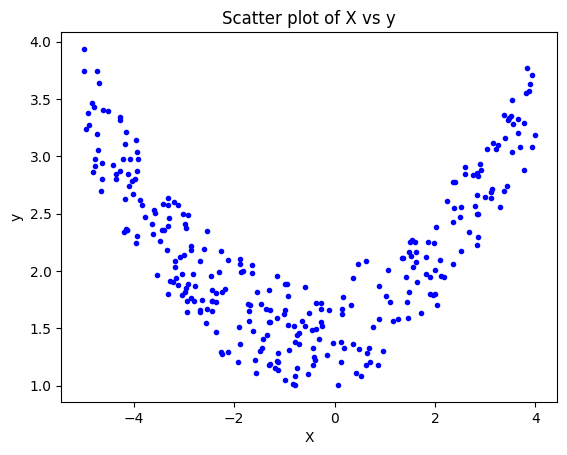

In [168]:
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter plot of X vs y")
plt.show()

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

-0.02750104559303157

In [170]:
X_train.shape

(240, 1)

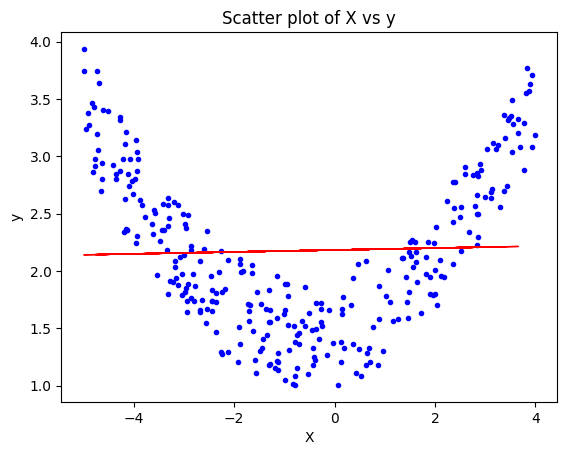

In [171]:
plt.plot(X, y, 'b.')
plt.plot(X_test, y_pred, 'r-', linewidth=1)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter plot of X vs y")
plt.show()

In [172]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [173]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [174]:
X_train_poly.shape, y_train.shape 

((240, 3), (240, 1))

In [175]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_poly_pred = poly_model.predict(X_test_poly)  
r2_score(y_test, y_poly_pred)

0.805966200149754

In [176]:
# ✅ Plot polynomial regression fit
X_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)
X_range_poly = poly.transform(X_range_scaled)
y_range_pred = poly_model.predict(X_range_poly)

In [177]:
X_range.shape

(200, 1)

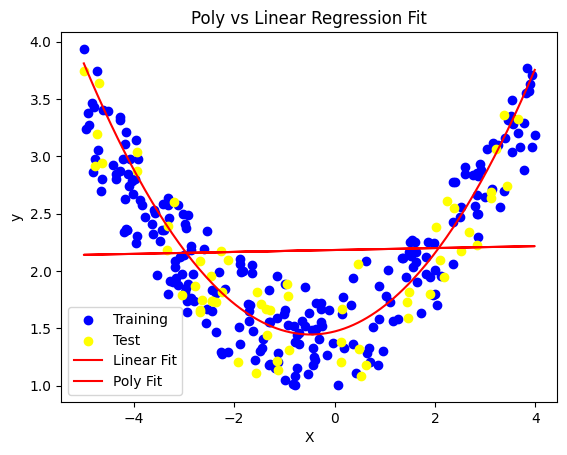

In [180]:
plt.scatter(X_train, y_train, color='blue', label='Training')
plt.scatter(X_test, y_test, color='yellow', label='Test')
plt.plot(X_train,model.predict(X_train),color='red',label='Linear Fit')
plt.plot(X_range,poly_model.predict(X_range_poly),color='red',label='Poly Fit')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Poly vs Linear Regression Fit")
plt.legend()
plt.show()